In [3]:
from pandas import read_csv
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error
from sklearn.preprocessing import PowerTransformer

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense
import tensorflow_addons as tfa

from matplotlib import pyplot
import matplotlib.pyplot as plt

In [2]:
path = 'https://raw.githubusercontent.com/benvictoria17/Finance/main/dataset/Auto%20Insurance/auto-insurance.csv'
df = read_csv(path, header=None)
X, y = df.values[:, :-1], df.values[:, -1]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, shuffle=True)
y_train, y_test = y_train.reshape((len(y_train),1)), y_test.reshape((len(y_test),1))

In [4]:
df.head()

,0,1
0,108,392.5
1,19,46.2
2,13,15.7
3,124,422.2
4,40,119.4


In [6]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
0,63.0,22.904762,23.351946,0.0,7.50,14.0,29.0,124.0
1,63.0,98.187302,87.327553,0.0,38.85,73.4,140.0,422.2


In [7]:
def power_transformer(X):
    pt = PowerTransformer()
    pt.fit(X)
    return pt
pt1 = power_transformer(X_train)
X_train = pt1.transform(X_train)
X_test = pt1.transform(X_test)
pt2 = power_transformer(y_train)
y_train = pt2.transform(y_train)
y_test = pt2.transform(y_test)

In [8]:
model = Sequential()
model.add(Dense(10, activation='relu', kernel_initializer='he_normal', input_shape=(X_train.shape[1],)))
model.add(Dense(8, activation='relu', kernel_initializer='he_normal'))
model.add(Dense(1))

optimizer = tfa.optimizers.AdamW(learning_rate=0.01, weight_decay=0.01)
model.compile(optimizer=optimizer, loss='mse')

2022-09-29 03:32:08.124449: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


In [10]:
callback = tf.keras.callbacks.EarlyStopping(
    monitor='val_loss',
    min_delta=0,
    patience=10,
    verbose=1,
    mode='auto',
    baseline=None,
    restore_best_weights=True
)
history = model.fit(X_train, y_train, epochs=300, batch_size=4, callbacks=[callback], validation_data=(X_test,y_test))

Epoch 1/300
11/11 [==============================] - 0s 8ms/step - loss: 0.3683 - val_loss: 0.1859
Epoch 2/300
11/11 [==============================] - 0s 5ms/step - loss: 0.3627 - val_loss: 0.1707
Epoch 3/300
11/11 [==============================] - 0s 5ms/step - loss: 0.3509 - val_loss: 0.1815
Epoch 4/300
11/11 [==============================] - 0s 5ms/step - loss: 0.3634 - val_loss: 0.1881
Epoch 5/300
11/11 [==============================] - 0s 5ms/step - loss: 0.3617 - val_loss: 0.1713
Epoch 6/300
11/11 [==============================] - 0s 5ms/step - loss: 0.3467 - val_loss: 0.1758
Epoch 7/300
11/11 [==============================] - 0s 5ms/step - loss: 0.3488 - val_loss: 0.1804
Epoch 8/300
11/11 [==============================] - 0s 5ms/step - loss: 0.3589 - val_loss: 0.1773
Epoch 9/300
11/11 [==============================] - 0s 5ms/step - loss: 0.3483 - val_loss: 0.1828
Epoch 10/300
11/11 [==============================] - 0s 5ms/step - loss: 0.3466 - val_loss: 0.1782
Epoch 11/

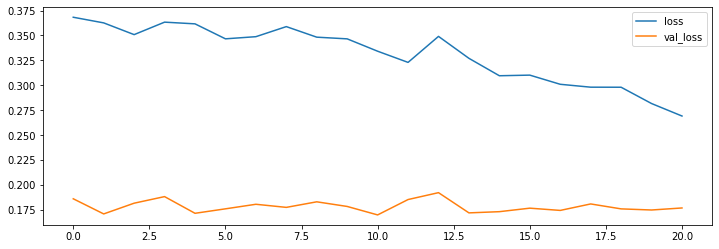

In [11]:
plt.figure(figsize=(12,4))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='val_loss')
plt.legend();

In [12]:
def predict(X, y_true):
    y_hat = model.predict(X)
    y_hat = pt2.inverse_transform(y_hat)
    y_true = pt2.inverse_transform(y_true)
    return y_hat, y_true
y_hat, y_test = predict(X_test, y_test)
score = mean_absolute_error(y_test, y_hat)
print('MAE: %.3f' % score)

MAE: 31.178
